# Euclidean and affine transformations
Please install the packages numpy and opencv.  
Run a CMD (Click on Windows Symbol and search for CMD).  
Enter: `pip install --user matplotlib opencv-python`

## Preparations

Make matplotlib and numpy available ...

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Print floating point numbers with a reduced precision:

In [2]:
np.set_printoptions(precision=2)

Use the following 2-by-12 matrix to draw a simple house:

In [3]:
X = np.array([[-6, -6, -7, 0, 7, 6,  6, -3, -3,  0,  0, -6],
              [-7,  2,  1, 8, 1, 2, -7, -7, -2, -2, -7, -7]], dtype=np.float)

no_rows, no_cols = X.shape[0], X.shape[1]
print("X is:"); print(X)

X is:
[[-6. -6. -7.  0.  7.  6.  6. -3. -3.  0.  0. -6.]
 [-7.  2.  1.  8.  1.  2. -7. -7. -2. -2. -7. -7.]]


Make points homogeneous:

In [4]:
one_row_shape = (1, no_cols) # only one row with ones!
one_row = np.ones(one_row_shape, dtype=np.float)
X_h = np.concatenate((X, one_row), axis=0) # axis 0 means downwards
print("X_h is:"); print(X_h)

X_h is:
[[-6. -6. -7.  0.  7.  6.  6. -3. -3.  0.  0. -6.]
 [-7.  2.  1.  8.  1.  2. -7. -7. -2. -2. -7. -7.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


## Scaling

Build up and apply the homography:

In [5]:
H_s = np.array([[1/2, 0, 0],
                [  0, 1, 0],
                [  0, 0, 1]], dtype=float)
X_s = H_s.dot(X_h) # apply homography

Make points inhomogeneous again:

In [7]:
X_si = X_s[0:2, :] / X_s[2, :] # make inhom. for plotting
print("X_si is:"); print(X_si)

X_si is:
[[-3.  -3.  -3.5  0.   3.5  3.   3.  -1.5 -1.5  0.   0.  -3. ]
 [-7.   2.   1.   8.   1.   2.  -7.  -7.  -2.  -2.  -7.  -7. ]]


Plot house and scaled house:

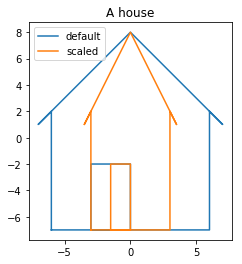

In [8]:
window_name = "A house"
plt.title(window_name)
plt.plot(X[0, :], X[1, :], label="default") # house
plt.plot(X_si[0, :], X_si[1, :], label="scaled") # scaled house
plt.gca().set_aspect('equal', adjustable='box') # equal scale for x and y axis
plt.legend(loc="upper left")
plt.show(window_name)

## Rotating

Build up homography and apply homography:

In [19]:
alpha_deg = -30
alpha = alpha_deg * np.pi / 180.0 # degrees to radians
# positive alpha -> rotation counter clockwise
c = np.cos(alpha)
s = np.sin(alpha)
H_r = np.array([[c, -s, 0],
                [s,  c, 0],
                [0,  0, 1]], dtype=float)
X_r = H_r.dot(X_h) # apply homography

Make points inhomogeneous again:

In [20]:
X_ri = X_r[0:2, :] / X_r[2, :]
print("X_ri is:"); print(X_ri)

X_ri is:
[[-8.7  -4.2  -5.56  4.    6.56  6.2   1.7  -6.1  -3.6  -1.   -3.5  -8.7 ]
 [-3.06  4.73  4.37  6.93 -2.63 -1.27 -9.06 -4.56 -0.23 -1.73 -6.06 -3.06]]


Plot house and rotated house:

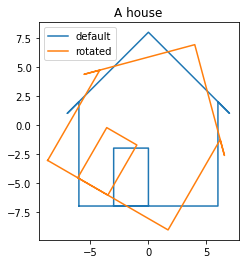

In [21]:
plt.title(window_name)
plt.plot(X[0, :], X[1, :], label="default") # house
plt.plot(X_ri[0, :], X_ri[1, :], label="rotated") # rotated house
plt.gca().set_aspect('equal', adjustable='box') # equal scale for x and y axis
plt.legend(loc="upper left")
plt.show(window_name)

## Translating

Build up homography and apply homography:

In [12]:
t_x = 2
t_y = -3
H_t = np.array([[1, 0, t_x],
                [0, 1, t_y],
                [0, 0,   1]], dtype=np.float)
X_t = H_t.dot(X_h) # apply homography

Make points inhomogeneous again:

In [13]:
X_ti = X_t[0:2, :] / X_t[2, :]
print("X_ti is:"); print(X_ti)

X_ti is:
[[ -4.  -4.  -5.   2.   9.   8.   8.  -1.  -1.   2.   2.  -4.]
 [-10.  -1.  -2.   5.  -2.  -1. -10. -10.  -5.  -5. -10. -10.]]


Plot house and translated house:

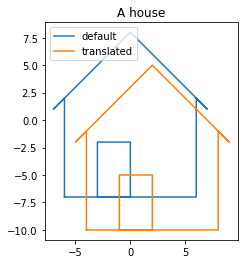

In [14]:
plt.title(window_name)
plt.plot(X[0, :], X[1, :], label="default") # house
plt.plot(X_ti[0, :], X_ti[1, :], label="translated") # translated house
plt.gca().set_aspect('equal', adjustable='box') # equal scale for x and y axis
plt.legend(loc="upper left")
plt.show(window_name)

## Mirroring

Build up homography and apply homography:


In [16]:
H_m = np.array([[1,  0, 0],
                [0, -1, 0],
                [0,  0, 1]], dtype=np.float)
X_m = H_m.dot(X_h)  # apply homography

Make points inhomogeneous again:


In [17]:
X_mi = X_m[0:2, :] / X_m[2, :]

Plot house and mirrored house:

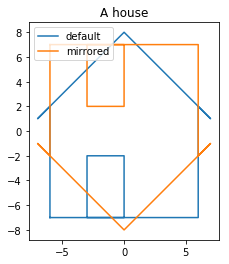

In [18]:
plt.title(window_name)
plt.plot(X[0, :], X[1, :], label="default") # house
plt.plot(X_mi[0, :], X_mi[1, :], label="mirrored") # mirrored house
plt.gca().set_aspect('equal', adjustable='box') # equal scale for x and y axis
plt.legend(loc="upper left")
plt.show(window_name)